In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import cavsim
from cavsim import Measure
from cavsim.connectors import BaseConnector, Connector
from cavsim.channels import ImportChannel, ExportChannel
from cavsim.components import BaseComponent, Component
from cavsim.solvers import BaseSolver, SimpleSolver
from cavsim.fluids import Fluid

In [3]:
from cavsim.pipes.pipe import Pipe
from cavsim.boundaries.left_boundary_pressure import LeftBoundaryPressure
from cavsim.boundaries.left_boundary_velocity import LeftBoundaryVelocity
from cavsim.boundaries.right_boundary_pressure import RightBoundaryPressure
from cavsim.boundaries.right_boundary_velocity import RightBoundaryVelocity
from cavsim.boundaries.simple_pipe_connector import PipeConnectorSimple
from cavsim.boundaries.zeta_joint import ZetaJoint
from cavsim.boundaries.simple_t_joint import SimpleTJoint
from cavsim.boundaries.simple_right_gasdampener import RightGasBubbleSimple
from cavsim.boundaries.simple_left_gasdampener import LeftGasBubbleSimple
from cavsim.boundaries.frictionless_gasdampener import FrictionlessGasDampener
from cavsim.boundaries.gasdampener import GasDampener
from cavsim.boundaries.pump_with_valves_model_try2 import PumpSuctionValve
from cavsim.boundaries.reflectionless_right_boundary_condition import RightBoundaryReflectionFree

In [4]:
fluid = Fluid(1000, 1e-3, 2.08e9, 2.3e3,initial_pressure=1.3e5)

In [5]:
def calculate_dynamic_flow(i_a, piston_radius, omega, width, time, number_of_chambers):
    result = (- (width * omega) / 2.0
              * (piston_radius - i_a / 2.0)**2
              * np.cos(2 * number_of_chambers *omega * time))
    return result

In [6]:
def calculate_constant_flow(i_a, piston_radius, omega, width):
    result = ((width * omega / 2.0)
              * (piston_radius**2
                 + piston_radius * i_a
                 - (3 * i_a**2)/ 4.0))
    return result 

In [7]:
def boundary_condition(time):
    
    rpm = 212
    piston_radius = 0.07085
    i_a = 2.0 * 56.68e-3
    omega = 2 * np.pi * rpm / 60
    width = 64.955e-3
    number_of_chambers = 4
    pipe_area = 0.056**2 / 4.0 * np.pi
    
    q_const  = calculate_constant_flow(i_a, piston_radius, omega, width)
    q_dynamic = calculate_dynamic_flow(i_a, piston_radius, omega, width, time, number_of_chambers)
    #q_dynamic = 10.0
    
    return (q_const + q_dynamic) / pipe_area

In [8]:
discharge = Pipe(0.056, 1.8, 0.002, 2e11, 1e-4, 20, initial_pressure=1.3e5, initial_velocity=boundary_condition(0))

In [9]:
lb = LeftBoundaryVelocity(boundary_condition, 1.3e5)
lb.connect(discharge)

In [10]:
rb = RightBoundaryPressure(1.3e5)
rb.connect(discharge)

In [11]:
plogs1 = []
plogs2 = []
plogs3 = []


def logging(time):
    plogs1.append(discharge.field_wide_slice('velocity', 0) + 0.0)
    plogs2.append(discharge.field_wide_slice('pressure', 0) + 0.0)
    plogs3.append(discharge.field_wide_slice('pressure', 0) + 0.0)

In [12]:
solver = SimpleSolver()
solver.fluid = fluid
solver.seeds = [discharge]
solver._callback = logging

In [13]:
solver.solve(1e20, 15.0, 3)

 0:00:00 [                              |  0.06%]  0:04:38  Currently at time   0.010 of  15.000

c:\cavsim\cavsim\cavsim\base\solvers\simple_solver.py:46: UserWarning: Smaller timestep required by component! (6.753335125833831e-05 < 1e+20 by <cavsim.pipes.pipe.Pipe object at 0x00000186BADEA348>)
  warn('Smaller timestep required by component! ({} < {} by {})'.format(component_time, delta_t, component))


 0:04:38 [==============================|100.00%]  0:00:00  Currently at time  15.000 of  15.000

In [14]:
pfield1 = np.stack(plogs1)
pfield2 = np.stack(plogs2)
pfield3 = np.stack(plogs3)

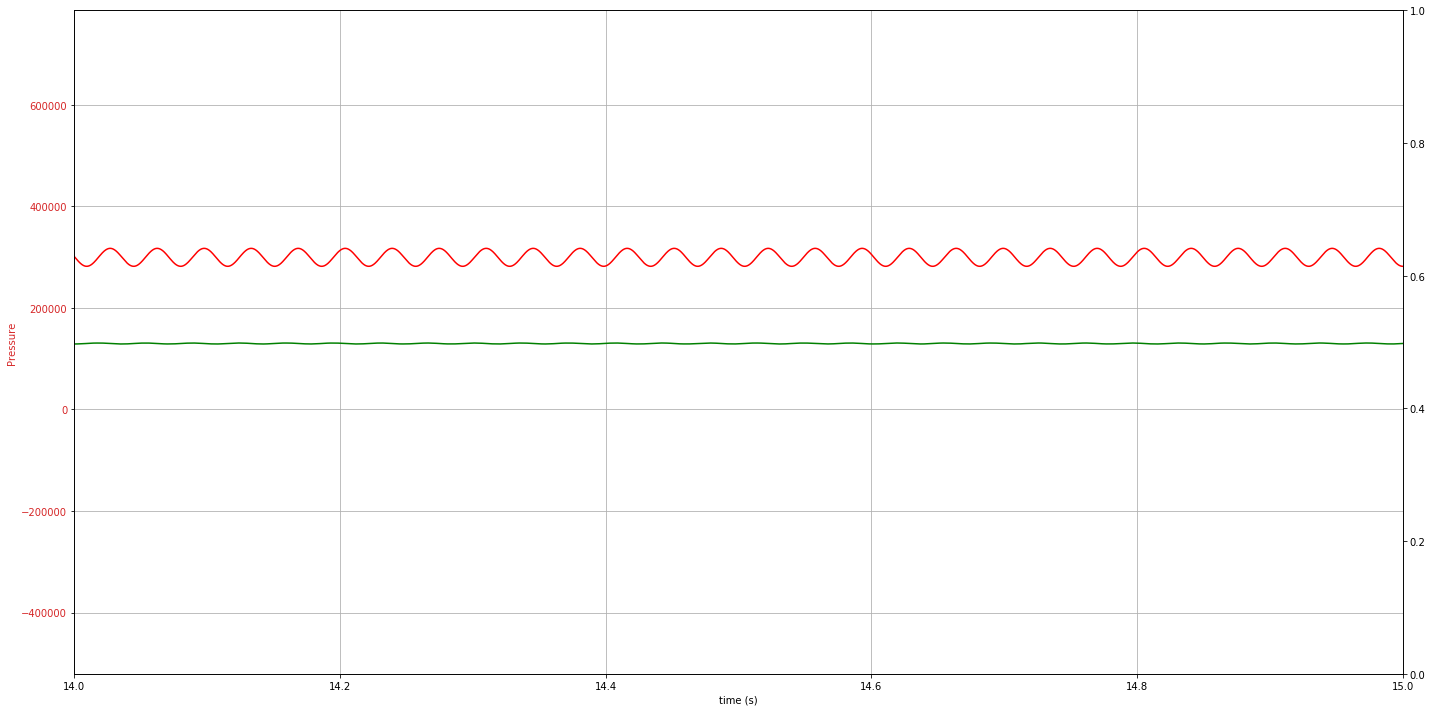

In [24]:
time = np.linspace(0, 15.0, int(pfield1[:,:].shape[0]))
#plt.figure(figsize=(16, 10))
fig, ax1 = plt.subplots(figsize=(20, 10))
#plt.subplot(1, 2, 1)
#plt.plot(vfield[:,0])
#plt.plot(1, 2, 2)
val1 = 0
val = -1
#val1 = 0
#val = -1

#upper_force = upperp_field[val1:val, 0] + gfield[val1:val, 0] + springforce[val1:val, 0]
#lower_force = lowp_field[val1:val, 0] + contact_pressure[val1:val, 0]
#result1 = lower_force - upper_force
#result2 = flow_field[val1:val, 0] - gfield[val1:val, 0] - springforce[val1:val, 0] - dampingfield[val1:val, 0]
#upper_flow = gfield[val1:val, 0] + springforce[val1:val, 0] + dampingfield[val1:val, 0]
#lower_flow = flow_field[val1:val, 0]
#ax1.plot(time[val1:val], upper_flow, color='red')
#ax1.plot(time[val1:val], lower_flow, color='blue')


#plt.subplot(1, 2, 2)
#ax1.plot(result1[val1:val])
#ax1.plot(result2[val1:val])
#ax1.plot(time[val1:val], upperp_field[val1:val, 0], color='red')
#ax1.plot(time[val1:val], lowp_field[val1:val, 0], color='green')
#ax1.plot(time[val1:val], dampingfield[val1:val, 0], color='blue')

#ax1.plot(time[val1:val], contact_pressure[val1:val, 0], color='black')
#ax1.plot(time[val1:val], springforce[val1:val, 0], color='grey')
#ax1.plot(time[val1:val], upper_force, color='red')
#ax1.plot(time[val1:val], lower_force, color='blue')

plt.plot(time[val1:val], pfield1[val1:val, 1]*3e5, color='red')
#plt.plot(time[val1:val], pump_velocity[val1:val, 0], color='black')
plt.plot(time[val1:val], pfield2[val1:val, -2], color='green')
#plt.plot(time[val1:val], pressure[val1:val, 0],color='violet')
plt.plot()

#ax1.plot(time[val1:val], deltap[val1:val, 0], color='green')

#plt.xlim(time[val1],time[val])
#plt.ylim(0e5, 22e5)

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Pressure', color=color)
#ax1.set_ylim(1.2e5, 1.35e5)
ax1.set_xlim(14, 15)
plt.grid()
#ax1.plot(time[val1:val], pfield1[val1:val, 1], color='red')
#ax1.plot(time[val1:val], pfield2[val1:val, -2], color='green')
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
#ax2.plot(time[val1:val], disfield[val1:val, 0]*1000, color=color)  # we already handled the x-label with ax1
#ax2.plot(time[val1:val], values[val1:val, 0]*1e3, color = 'black')
#ax2.plot(time[val1:val], velocity[val1:val, 1]*(np.pi*(0.056/2)**2), color = 'red')
#ax2.set_ylim(0e5, 0.001)
#ax2.plot(time[val1:val], contact_pressure_force[val1:val, 0], color = 'green')
#ax2.plot(time[val1:val], spring_force[val1:val, 0], color = 'green')
#ax2.plot(time[val1:val], contact_pressure_force[val1:val, 0]+lower_pressure_force[val1:val, 0], color = 'black')
#ax2.plot(time[val1:val], flow_force[val1:val, 0]-spring_force[val1:val, 0], color = 'red')
#ax2.plot(time[val1:val], zeta[val1:val, 0], color='green')
#ax2.plot(time[val1:val], flow_field[val1:val, 0], color='black')
#ax2.tick_params(axis='y', labelcolor=color)

#plt.subplot(1, 2, 1)
#plt.plot(time[val1:val], disfield[val1:val, 0]*1000, color='black')
#plt.plot(time[val1:val], pump(time[val1:val]))
#plt.plot(time[val1:val], velfield[val1:val, 0], color='blue')
#plt.plot(time[val1:val], pfield2[val1:val, 1], color='red')
#pltplot(time[val1:val], pfield1[val1:val, -2], color='green')
#plt.ylim(-2e3, 2e3)
fig.tight_layout()
plt.show()

In [16]:
#a = 70/60*(0.07**2)/4*np.pi*0.045

In [17]:
#a = 70/60(0.07**2)/4*np.pi*0.045
#a/(2*0.025**2/4.0*np.pi)
#print(pump._cases[val1:val])

In [18]:
zetavalue = (2*(20e5-1.28e5)/((0.2058**2)*1000))

In [19]:
import nptdms
from nptdms import TdmsFile
savepath = 'L:/017_Messdaten_Pascal/Messdatensatz 0,5m Fuellstand'
path = "L:/017_Messdaten_Pascal/Messdatensatz 0,5m Fuellstand"

In [20]:
def writetdms(tdms, num):
    groups = tdms.groups()
    channels = tdms.group_channels(groups[0])
    channel_names = [channel.channel for channel in channels]
    obj = tdms.object(groups[0], channel_names[num])
    data = np.asarray(obj.data)
    

    return data



def datetime_to_float(timesignal):

    t0 = timesignal[0]
    t1 = timesignal[timesignal.shape[0] - 1]
    sec = (t1-t0).total_seconds()
    time = np.linspace(0, sec, timesignal.shape[0])

    return time

In [21]:
size = 128000
tpAr = np.empty(size)
pAr = np.empty(size)

In [22]:
ch = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25)
tdms = TdmsFile(path+'/Messungen_' +str(3)+".tdms")
tpAr = datetime_to_float(writetdms(tdms, ch[10]))
pAr = writetdms(tdms, ch[11])

FileNotFoundError: [Errno 2] No such file or directory: 'L:/017_Messdaten_Pascal/Messdatensatz 0,5m Fuellstand/Messungen_3.tdms'

In [ ]:
new_time = np.linspace(0, (time[-12000-38000]-time[65000]), time[65000:-12000-38000].shape[0])
print(new_time)
plt.figure(figsize=(20, 10))
plt.plot(tpAr[7500:19500]-tpAr[7500], pAr[7500:19500]*1e5, label='Messung')
plt.plot(new_time, pressure[65000:-12000-38000, 0],color='red', label='Simulation')
plt.xlabel('Zeit in Sekunden', fontsize='14')
plt.ylabel('Druck in Pascal', fontsize='14')
plt.legend(fontsize='14')
plt.ylim(0e5,22e5)
plt.grid()
#plt.savefig('L:/023_CavSim_Plots/Simulation_70Umin.png')


In [ ]:
fig, ax1 = plt.subplots(figsize=(20, 10))
ax1.tick_params(axis='x', labelsize='20')
#ax1.set_title('Vergleich von Messung und Simulation bei 70 U/min', fontsize='30')
color = 'tab:blue'
ln1 = ax1.plot(tpAr[7500:19500]-tpAr[7500], pAr[7500:19500]*1e5, label='Messung')
ln2 = ax1.plot(new_time, pressure[65000:-12000-38000, 0],color='red', label='Simulation')
ax1.set_ylim(0, 22e5)
ax1.set_xlabel('Zeit in $s$', fontsize='24')
ax1.set_ylabel('Druck in $Pa$', color=color, fontsize='24')
ax1.tick_params(axis='y', labelcolor=color, labelsize='20')
#ax1.minorticks_on()
#ax1.grid(which='major', linestyle='--', linewidth='0.5', color='grey')
# Customize the minor grid
# ax1.grid(which='minor', linestyle=':', linewidth='0.5', color='grey')
#ax1.tick_params(which='both',  # Options for both major and minor ticks
#                top='off',  # turn off top ticks
#                left='off',  # turn off left ticks
#                right='off',  # turn off right ticks
#                bottom='off')  # turn off bottom ticks

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
#ax2.set_ylim(0e5, 23e5)
#ln3 = ax2.plot(time, flow,color='red', label='Ventilhub')
ln3 = ax2.plot(new_time, values[65000:-12000-38000, 0]*1000,color='green', label='Simulation Ventilhub')
ax2.set_ylim(0.0, 1.5)
ax2.set_ylabel('Hub in $mm$', color=color, fontsize='24')
ax2.minorticks_on()
#ax1.grid(which='minor', linestyle='--', linewidth='0.5', color='grey')
# Customize the minor grid
# ax1.grid(which='minor', linestyle=':', linewidth='0.5', color='grey')
ax2.tick_params(which='both',  # Options for both major and minor ticks
                top='off',  # turn off top ticks
                left='off',  # turn off left ticks
                right='off',  # turn off right ticks
                bottom='off',  # turn off bottom ticks
                labelsize='20',
                labelcolor=color)
#ax3 = ax2.twinx()
#color = 'tab:green'
#ln3 = ax3.plot(t_hub[613:,], hub[613:,], color='green', label='Hub')
#ax3.set_xlim(0.325,0.725)
#ax2.set_ylim(np.min(flow),0.3)
#ax3.set_xlabel('Zeit (s)')
#ax3.set_ylabel('Hub in $mm$', color=color, fontsize='20')
#ax3.minorticks_on()
#ax1.grid(which='minor', linestyle='--', linewidth='0.5', color='grey')
# Customize the minor grid
# ax1.grid(which='minor', linestyle=':', linewidth='0.5', color='grey')
#ax3.tick_params(which='both',  # Options for both major and minor ticks
#                top='off',  # turn off top ticks
#                left='off',  # turn off left ticks
#                right='off',  # turn off right ticks
#                bottom='off',  # turn off bottom ticks
#                labelsize='16',
#                labelcolor=color)
#ax3.spines["right"].set_position(("axes", 1.05))

lns = ln1 + ln2 + ln3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='lower right', frameon=False, fontsize='24')
plt.savefig('L:/023_CavSim_Plots/Simulation_70Umin.png',dpi=800)
plt.show()

In [ ]:
print(tpAr[7500:19500]-tpAr[7500])

In [ ]:
print((np.max(pAr[7500:19500]*1e5)-np.max(pressure[60500:-1400, 0]))/np.max(pAr[7500:19500]*1e5)*100)